##### Install Necessary Libraries: Use the following commands in your terminal or notebook to install libraries:

In [20]:
pip install pandas numpy matplotlib seaborn statsmodels

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


##### Load Libraries in Your Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### Step 2: Load Your Data

##### Export the S&P 500 and Federal Interest Rates data from Bloomberg Terminal to CSV files.

In [2]:
# Load datasets
sp500 = pd.read_csv('S&P_Month.csv')  # Replace with your file name
interest_rates = pd.read_csv('FED_Month.csv')  # Replace with your file name

# Display first few rows to verify
print(sp500.head())
print(interest_rates.head())

       Date  PX_LAST  PX_OPEN
0  30/11/24  6032.38  5723.22
1  31/10/24  5705.45  5757.73
2  30/09/24  5762.48  5623.89
3  30/08/24  5648.40  5537.84
4  31/07/24  5522.30  5471.08
       Date  PX_LAST  CHG_PCT_1D
0  30/11/24     4.64       -3.93
1  31/10/24     4.83       -5.85
2  30/09/24     5.13       -3.75
3  30/08/24     5.33        0.00
4  31/07/24     5.33        0.00


#### Step 3: Clean and Align Data

##### Convert Date Columns to Datetime:

In [3]:
print(sp500.columns)
print(interest_rates.columns)

Index(['Date', 'PX_LAST', 'PX_OPEN'], dtype='object')
Index(['Date', 'PX_LAST', 'CHG_PCT_1D'], dtype='object')


In [4]:
sp500.rename(columns={'YourDateColumnName': 'Date'}, inplace=True)
interest_rates.rename(columns={'YourDateColumnName': 'Date'}, inplace=True)

In [5]:
print(sp500['Date'].head())
print(interest_rates['Date'].head())

0    30/11/24
1    31/10/24
2    30/09/24
3    30/08/24
4    31/07/24
Name: Date, dtype: object
0    30/11/24
1    31/10/24
2    30/09/24
3    30/08/24
4    31/07/24
Name: Date, dtype: object


In [6]:
sp500['Date'] = pd.to_datetime(sp500['Date'], errors='coerce')  # Use errors='coerce' to handle invalid dates
interest_rates['Date'] = pd.to_datetime(interest_rates['Date'], errors='coerce')

/var/folders/_q/jtstln817kgg45ngwf8n58c00000gn/T/ipykernel_99238/172891302.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500['Date'] = pd.to_datetime(sp500['Date'], errors='coerce')  # Use errors='coerce' to handle invalid dates
/var/folders/_q/jtstln817kgg45ngwf8n58c00000gn/T/ipykernel_99238/172891302.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  interest_rates['Date'] = pd.to_datetime(interest_rates['Date'], errors='coerce')


In [7]:
print(sp500[sp500['Date'].isnull()])
print(interest_rates[interest_rates['Date'].isnull()])

Empty DataFrame
Columns: [Date, PX_LAST, PX_OPEN]
Index: []
Empty DataFrame
Columns: [Date, PX_LAST, CHG_PCT_1D]
Index: []


In [8]:
sp500.dropna(subset=['Date'], inplace=True)
interest_rates.dropna(subset=['Date'], inplace=True)

In [9]:
print(sp500.head())
print(interest_rates.head())

        Date  PX_LAST  PX_OPEN
0 2024-11-30  6032.38  5723.22
1 2024-10-31  5705.45  5757.73
2 2024-09-30  5762.48  5623.89
3 2024-08-30  5648.40  5537.84
4 2024-07-31  5522.30  5471.08
        Date  PX_LAST  CHG_PCT_1D
0 2024-11-30     4.64       -3.93
1 2024-10-31     4.83       -5.85
2 2024-09-30     5.13       -3.75
3 2024-08-30     5.33        0.00
4 2024-07-31     5.33        0.00


In [10]:
sp500['Date'] = pd.to_datetime(sp500['Date'])
interest_rates['Date'] = pd.to_datetime(interest_rates['Date'])

##### Merge the Datasets: Align both datasets by date

In [11]:
# Merge on the Date column
data = pd.merge(sp500, interest_rates, on='Date', how='inner')

# Rename columns for clarity
data.rename(columns={'SP500_Close': 'S&P_500', 'Interest_Rate': 'InterestRate'}, inplace=True)

In [12]:
print(data.isnull().sum())
data.dropna(inplace=True)  # Drop rows with missing values

Date          0
PX_LAST_x     0
PX_OPEN       0
PX_LAST_y     0
CHG_PCT_1D    0
dtype: int64


In [13]:
print(data.head()) # merged data

        Date  PX_LAST_x  PX_OPEN  PX_LAST_y  CHG_PCT_1D
0 2024-11-30    6032.38  5723.22       4.64       -3.93
1 2024-10-31    5705.45  5757.73       4.83       -5.85
2 2024-09-30    5762.48  5623.89       5.13       -3.75
3 2024-08-30    5648.40  5537.84       5.33        0.00
4 2024-07-31    5522.30  5471.08       5.33        0.00


##### replacing to avoid confusion

##### Calculate Returns: Compute monthly returns for S&P 500 and rate changes:

In [14]:
data.rename(columns={
    'PX_LAST_x': 'SP500_Close',
    'PX_OPEN': 'SP500_Open',
    'PX_LAST_y': 'InterestRate',
    'CHG_PCT_1D': 'Rate_Change_Pct'
}, inplace=True)

In [15]:
print(data.head())

        Date  SP500_Close  SP500_Open  InterestRate  Rate_Change_Pct
0 2024-11-30      6032.38     5723.22          4.64            -3.93
1 2024-10-31      5705.45     5757.73          4.83            -5.85
2 2024-09-30      5762.48     5623.89          5.13            -3.75
3 2024-08-30      5648.40     5537.84          5.33             0.00
4 2024-07-31      5522.30     5471.08          5.33             0.00


In [17]:
data['SP500_Return'] = (data['SP500_Close'] - data['SP500_Open']) / data['SP500_Open']

###### Check Data Types: Ensure all columns are in the correct data types, especially Date as datetime:

In [18]:
print(data.dtypes)

Date               datetime64[ns]
SP500_Close               float64
SP500_Open                float64
InterestRate              float64
Rate_Change_Pct           float64
SP500_Return              float64
dtype: object


In [19]:
print(data.isnull().sum()) #Check for Missing Values

Date               0
SP500_Close        0
SP500_Open         0
InterestRate       0
Rate_Change_Pct    0
SP500_Return       0
dtype: int64


####  Exploratory Data Analysis (EDA)

In [21]:
print(data.describe()) #stats

                      Date  SP500_Close   SP500_Open  InterestRate  \
count                  120   120.000000   120.000000    120.000000   
mean   2019-12-15 00:36:00  3333.699167  3304.079833      1.746250   
min    2014-12-31 00:00:00  1920.030000  1919.650000      0.050000   
25%    2017-06-22 12:00:00  2420.507500  2408.862500      0.120000   
50%    2019-12-15 00:00:00  2978.560000  2977.300000      1.150000   
75%    2022-06-07 12:00:00  4180.165000  4170.850000      2.400000   
max    2024-11-30 00:00:00  6032.380000  5757.730000      5.330000   
std                    NaN  1075.861823  1054.882210      1.862809   

       Rate_Change_Pct  SP500_Return  
count       120.000000    120.000000  
mean          6.895333      0.009075  
min         -92.310000     -0.131020  
25%           0.000000     -0.016068  
50%           0.415000      0.013670  
75%           8.362500      0.033979  
max         150.000000      0.165867  
std          26.214960      0.045348  


##### Correlation Analysis: Check if there is any correlation between S&P 500 returns and interest rate changes:

In [32]:
print(data[['SP500_Return', 'Rate_Change_Pct']].corr())

                 SP500_Return  Rate_Change_Pct
SP500_Return         1.000000        -0.129744
Rate_Change_Pct     -0.129744         1.000000


##### Visualizations: Line Plot of S&P 500 Close and Interest Rate Over Time:

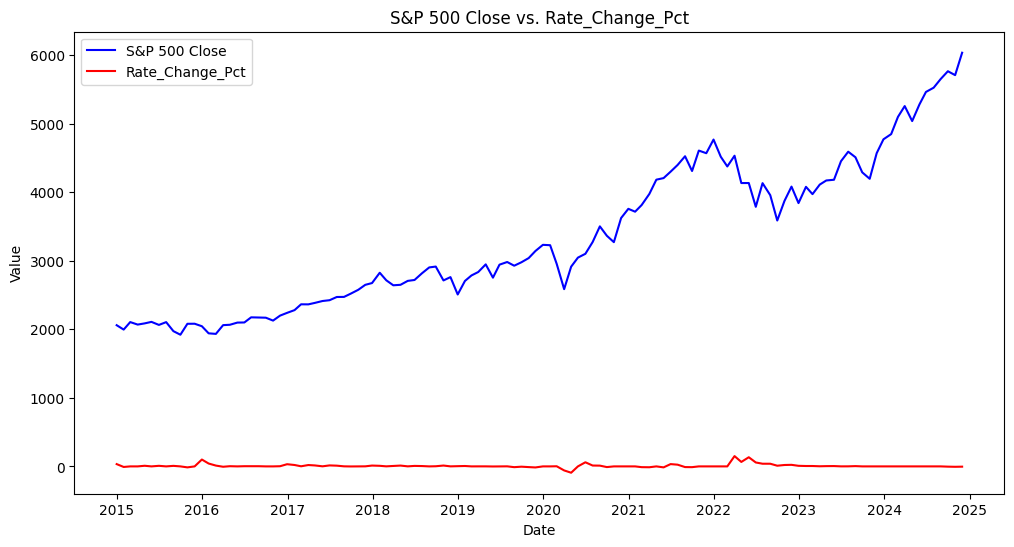

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['SP500_Close'], label='S&P 500 Close', color='blue')
plt.plot(data['Date'], data['Rate_Change_Pct'], label='Rate_Change_Pct', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('S&P 500 Close vs. Rate_Change_Pct')
plt.legend()
plt.show()

##### Scatter Plot Between S&P 500 Returns and Rate Change:

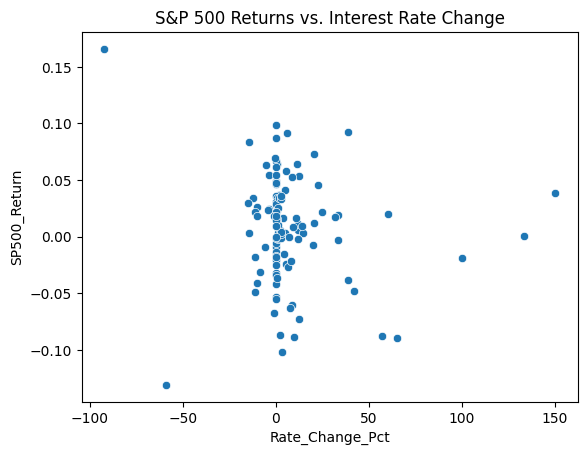

In [31]:
sns.scatterplot(data=data, x='Rate_Change_Pct', y='SP500_Return')
plt.title('S&P 500 Returns vs. Interest Rate Change')
plt.show()

#### Regression Analysis

##### Prepare Data for Regression:

##### Independent Variable: Rate_Change_Pct
##### Dependent Variable: SP500_Return

In [33]:
import statsmodels.api as sm

X = data[['Rate_Change_Pct']]  # Independent variable
y = data['SP500_Return']  # Dependent variable
X = sm.add_constant(X)  # Add a constant term for the intercept

In [34]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           SP500_Return   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.020
Date:                Thu, 19 Dec 2024   Prob (F-statistic):              0.158
Time:                        21:12:28   Log-Likelihood:                 202.45
No. Observations:                 120   AIC:                            -400.9
Df Residuals:                     118   BIC:                            -395.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0106      0.004     

#### Insights and Visualization

##### Regression Line

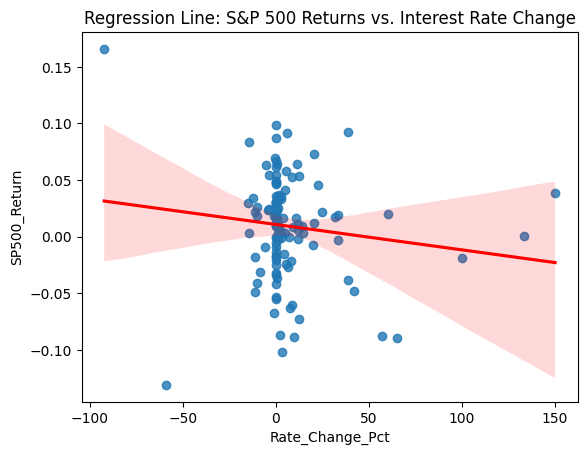

In [35]:
sns.regplot(data=data, x='Rate_Change_Pct', y='SP500_Return', line_kws={'color': 'red'})
plt.title('Regression Line: S&P 500 Returns vs. Interest Rate Change')
plt.show()

##### Group Analysis: Group the data by periods of rate hikes (Rate_Change_Pct > 0) vs. no hikes:

In [36]:
data['Rate_Hike'] = data['Rate_Change_Pct'].apply(lambda x: 'Hike' if x > 0 else 'No Hike')
avg_returns = data.groupby('Rate_Hike')['SP500_Return'].mean()
print(avg_returns)

Rate_Hike
Hike       0.003958
No Hike    0.014544
Name: SP500_Return, dtype: float64


##### Visualize Average Returns:

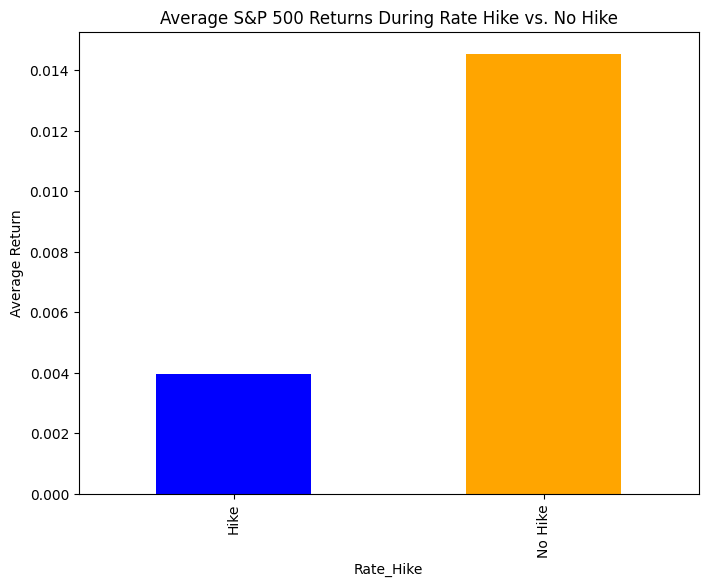

In [37]:
avg_returns.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))
plt.title('Average S&P 500 Returns During Rate Hike vs. No Hike')
plt.ylabel('Average Return')
plt.show()

In [38]:
data.to_csv('processed_data.csv', index=False)

In [39]:
plt.savefig('plot_name.png')


<Figure size 640x480 with 0 Axes>